<a href="https://colab.research.google.com/github/naralakamsani/unsupervised_learning/blob/main/reservation_retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
from google.colab import drive

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, validation_curve, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt

import time

#Data

[Hotel Reservation](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset?select=Hotel+Reservations.csv)


##Load Data

In [ ]:
!curl -o Hotel_Reservations.csv https://raw.githubusercontent.com/naralakamsani/supervised_learning/main/data/reservation_retention/Hotel%20Reservations.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3164k  100 3164k    0     0  9407k      0 --:--:-- --:--:-- --:--:-- 9418k


In [ ]:
df = pd.read_csv("Hotel_Reservations.csv")

In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Encode Labeled Data

In [ ]:
df = df.drop(columns=["Booking_ID"])

df['booking_status'].replace('Not_Canceled', 0, inplace=True)
df['booking_status'].replace('Canceled', 1, inplace=True)

df['type_of_meal_plan'].replace('Not Selected', 0, inplace=True)
df['type_of_meal_plan'].replace('Meal Plan 1', 1, inplace=True)
df['type_of_meal_plan'].replace('Meal Plan 2', 2, inplace=True)
df['type_of_meal_plan'].replace('Meal Plan 3', 3, inplace=True)

df['room_type_reserved'].replace('Room_Type 1', 1, inplace=True)
df['room_type_reserved'].replace('Room_Type 2', 2, inplace=True)
df['room_type_reserved'].replace('Room_Type 3', 3, inplace=True)
df['room_type_reserved'].replace('Room_Type 4', 4, inplace=True)
df['room_type_reserved'].replace('Room_Type 5', 5, inplace=True)
df['room_type_reserved'].replace('Room_Type 6', 6, inplace=True)
df['room_type_reserved'].replace('Room_Type 7', 7, inplace=True)

df['market_segment_type'].replace('Offline', 0, inplace=True)
df['market_segment_type'].replace('Online', 1, inplace=True)
df['market_segment_type'].replace('Corporate', 2, inplace=True)
df['market_segment_type'].replace('Aviation', 3, inplace=True)
df['market_segment_type'].replace('Complementary', 4, inplace=True)

In [ ]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017,10,2,0,0,0,0,65.00,0,0
1,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.68,1,0
2,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0,1
3,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00,0,1
4,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.50,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int64  
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

## Split Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['booking_status'],axis=1), df['booking_status'], test_size=0.2, random_state=1)

In [ ]:
print("Train data size:", len(x_train))
print("Test data size:", len(x_test))

Train data size: 29020
Test data size: 7255


## Balance Dataset

In [ ]:
print('Training Set Class Balance:')
print(y_train.value_counts())

Training Set Class Balance:
0    19483
1     9537
Name: booking_status, dtype: int64


In [ ]:
# rus = RandomUnderSampler(random_state=0)
# x_train, y_train = rus.fit_resample(x_train, y_train)

In [ ]:
print('Training Set Class Balance:')
print(y_train.value_counts())

Training Set Class Balance:
0    19483
1     9537
Name: booking_status, dtype: int64


## Scale Data

In [ ]:
x_train_not_scaled = x_train
x_test_not_scaled = x_test

scaler =  MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

In [ ]:
x_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.25,0.0,0.333333,0.176471,0.333333,0.0,0.0,0.259594,1.0,0.090909,0.866667,0.00,0.0,0.000000,0.000000,0.140741,0.0
1,0.50,0.0,0.333333,0.058824,0.666667,0.0,0.0,0.295711,0.0,0.636364,0.466667,0.00,0.0,0.000000,0.000000,0.175000,0.0
2,0.50,0.0,0.166667,0.000000,0.333333,0.0,0.5,0.036117,1.0,0.727273,0.833333,0.25,0.0,0.000000,0.000000,0.303704,0.0
3,0.50,0.0,0.333333,0.117647,0.666667,0.0,0.0,0.381490,1.0,0.272727,0.700000,0.00,0.0,0.000000,0.000000,0.196296,0.0
4,0.25,0.0,0.166667,0.000000,0.333333,1.0,0.0,0.011287,1.0,1.000000,0.133333,1.00,1.0,0.153846,0.137931,0.000000,0.2


# Plots

## Validation Curve

In [ ]:
def plot_validation_curve(estimator, title, x, y, param_name, param_range, cv=5, n_jobs=-1, scoring="f1"):
    plt.figure()
    plt.title(title)

    plt.xlabel(param_name)
    plt.ylabel("f1 score")
    train_scores, test_scores = validation_curve(estimator, x, y, scoring=scoring, cv=cv, n_jobs=n_jobs,param_name=param_name, param_range=param_range)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(param_range, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(param_range, test_scores_mean, 'o-', color="g", label="Cross validation Score")

    plt.legend(loc="best")
    return plt

## Learning Curve

In [ ]:
def plot_learning_curve(estimator, title, x, y, cv=5, n_jobs=-1, train_sizes=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], scoring='f1'):
    plt.figure()
    plt.title(title)

    plt.xlabel("Training examples")
    plt.ylabel("f1 score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross validation Score")

    plt.legend(loc="best")
    return plt

## Validation Barplot

In [ ]:
def plot_validation_barplot(title, x, y, parameters, cv=5, n_jobs=-1, scoring='f1'):
    plt.figure()
    plt.title(title)

    plt.ylabel('f1 score')
    plt.xlabel("hidden_layer_sizes")

    train_scores = []
    test_scores = []

    for parameter in parameters:
      estimator = MLPClassifier(random_state=1, hidden_layer_sizes = parameter, learning_rate_init=0.01)
      scores = cross_validate(estimator, x, y, cv=cv, scoring=scoring, n_jobs=n_jobs, return_train_score=True)
      train_scores.append(np.mean(scores["train_score"]))
      test_scores.append(np.mean(scores["test_score"]))

    plt.grid()

    bar_width = 0.35
    index = np.arange(len(parameters))

    bar1 = plt.bar(index, train_scores, bar_width, label='Training Score', alpha=0.7)
    bar2 = plt.bar(index + bar_width, test_scores, bar_width, label='Cross validation Score', alpha=0.7)

    plt.xticks(index + bar_width*2/3, parameters)
    plt.legend(loc="best")

    return plt

## Loss Curve

In [ ]:
def plot_loss_curve(estimator, title, x, y):
    plt.figure()
    plt.title(title)

    plt.xlabel("Iterations")
    plt.ylabel("Loss")

    estimator.fit(x, y)

    plt.grid()

    plt.plot(estimator.loss_curve_)

    return plt

## Model Comparison Plot

In [ ]:
def compare_models():
    models = ['Decision Tree', 'Neural Network', 'Boosting', 'SVM', 'KNN']

    estimators = [DecisionTreeClassifier(random_state=1, class_weight="balanced"),
                  MLPClassifier(random_state=1, hidden_layer_sizes=(50,), learning_rate_init=0.01),
                  GradientBoostingClassifier(random_state=1, n_estimators=250, subsample=0.5),
                  SVC(random_state=1, kernel ='rbf', C=10),
                  KNeighborsClassifier(n_neighbors=11, p=2)
                  ]

    training_times = []
    inference_times = []
    scores = []

    for estimator in estimators:
        start_time = time.time()
        estimator.fit(x_train, y_train)
        elapsed_time = time.time() - start_time
        training_times.append(elapsed_time)

        start_time = time.time()
        predictions = estimator.predict(x_test)
        elapsed_time = time.time() - start_time
        inference_times.append(elapsed_time)

        scores.append(f1_score(y_test, predictions))

    plt.figure()

    #Training
    plt.bar(models, training_times, color=['blue', 'green', 'red', 'purple', 'yellow'])

    plt.ylabel('Training Time (seconds)')
    plt.xlabel('Models')
    plt.title('Reservations: Comparison of Model Training Speeds')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    #Inference
    plt.bar(models, inference_times, color=['blue', 'green', 'red', 'purple', 'yellow'])

    plt.ylabel('Inferece Time (seconds)')
    plt.xlabel('Models')
    plt.title('Reservations: Comparison of Model Inference Speeds')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    #RMSE
    plt.bar(models, scores, color=['blue', 'green', 'red', 'purple', 'yellow'])

    plt.ylabel('f1 score')
    plt.xlabel('Models')
    plt.title('Reservations: Comparison of Model f1 score')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


In [ ]:
def get_model_performance_info(estimator, title, x, y, cv=10, n_jobs=-1, train_sizes=[0.1,0.25,0.4,0.65,0.8,1], scoring="f1"):
    plt.figure()
    plt.title(title)

    plt.xlabel("Training examples")
    plt.ylabel("f1 score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross validation Score")

    plt.legend(loc="best")
    return plt

DT: Pruning

Boosting: # of Weak Learners

NN: Hidden Layer Size (Width, Depth)

SVM: Kernel Type

KNN: K

# Decision Tree

## Grid Search

In [ ]:
# dt_parameters = {
#     'max_depth': [None, 10, 20, 25],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5, 10],
#     'criterion': ['gini', 'entropy', 'log_loss']
# }

# clf = GridSearchCV(DecisionTreeClassifier(random_state=1), dt_parameters, cv=5, scoring='f1')
# clf.fit(x_train, y_train)
# print(clf.best_params_)

## Validation Curves

### Max depth

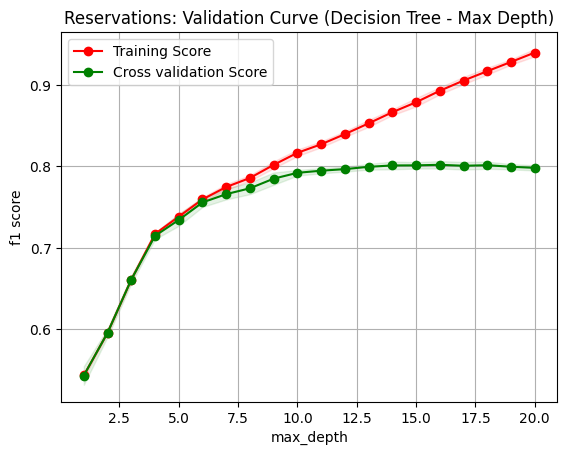

In [ ]:
plot_validation_curve(DecisionTreeClassifier(random_state=1, class_weight="balanced"), "Reservations: Validation Curve (Decision Tree - Max Depth)", x_train, y_train, param_range=np.arange(1, 21), param_name="max_depth")
plt.show()

### Min Samples Leaf

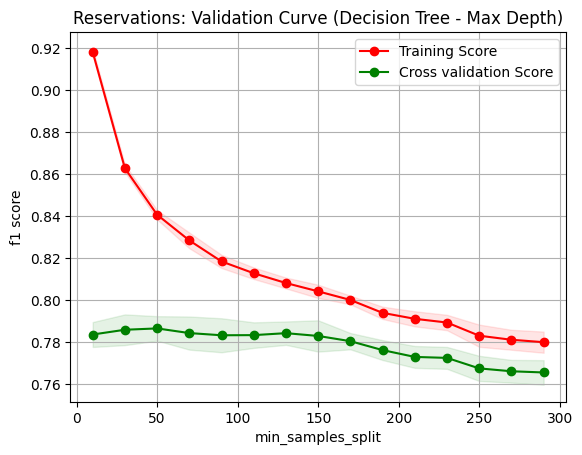

In [ ]:
plot_validation_curve(DecisionTreeClassifier(random_state=1, class_weight="balanced"), "Reservations: Validation Curve (Decision Tree - Max Depth)", x_train, y_train, param_range=np.arange(10, 300, 20), param_name="min_samples_split")
plt.show()

## Learning Curve

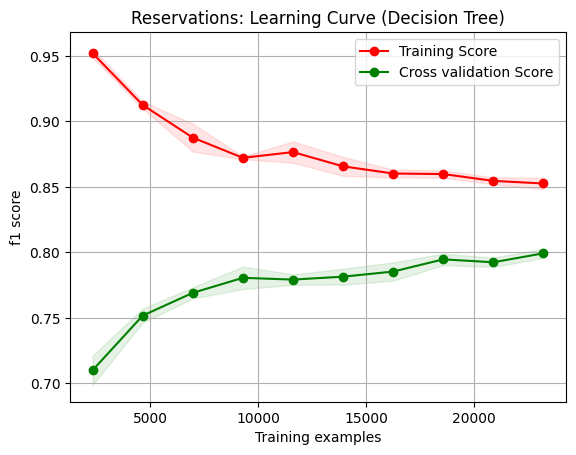

In [ ]:
plot_learning_curve(DecisionTreeClassifier(random_state=1, class_weight="balanced", max_depth=13), "Reservations: Learning Curve (Decision Tree)", x_train, y_train)
plt.show()

## Evaluation

In [ ]:
dt_model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
y_pred = dt_model.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.71      0.78      4907
           1       0.56      0.76      0.64      2348

    accuracy                           0.73      7255
   macro avg       0.71      0.74      0.71      7255
weighted avg       0.76      0.73      0.74      7255



#Neural Network


## Grid Search

In [ ]:
# mlp_parameters = {
#     'hidden_layer_sizes': [(50,50),(100,100),(100,50),(50,100),(200,200)],
#     'learning_rate_init': [0.001, 0.01, 0.1],
#     'alpha': [0.0001, 0.001, 0.01]
# }

# clf = GridSearchCV(MLPClassifier(random_state=1, max_iter=1000), mlp_parameters, cv=5, scoring='f1')
# clf.fit(x_train, y_train)
# print(clf.best_params_)

## Validation Curves/Plots

### Hidden Layer Size

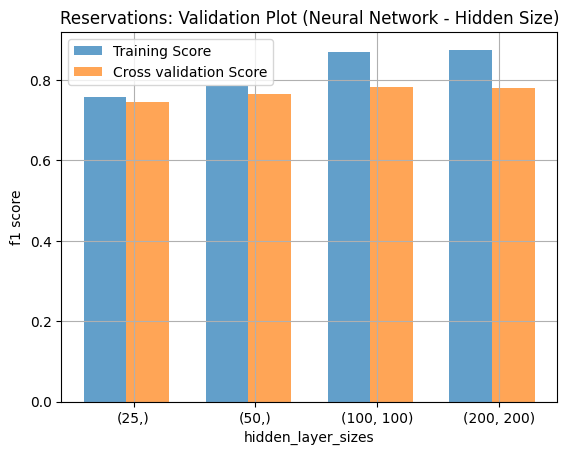

In [ ]:
plot_validation_barplot("Reservations: Validation Plot (Neural Network - Hidden Size)", x_train, y_train, parameters=[(25,),(50,),(100,100),(200,200)])
plt.show()

### Learning Rate

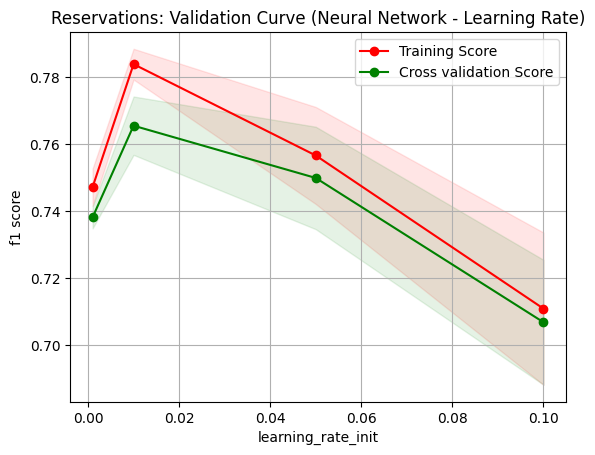

In [ ]:
plot_validation_curve(MLPClassifier(random_state=1, hidden_layer_sizes=(50,)), "Reservations: Validation Curve (Neural Network - Learning Rate)", x_train, y_train, param_range=[0.001,0.01,0.05,0.1], param_name="learning_rate_init")
plt.show()

## Loss Curve

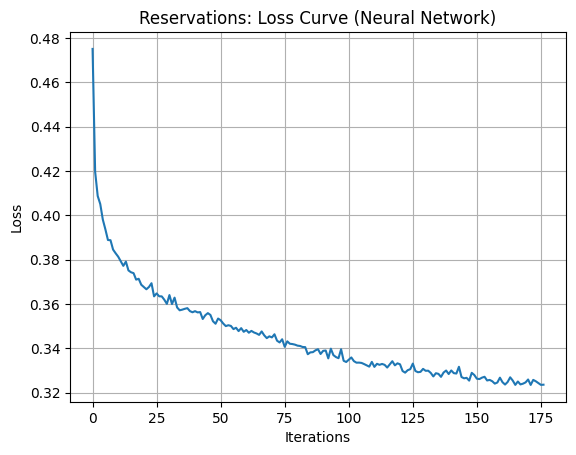

In [ ]:
plot_loss_curve(MLPClassifier(random_state=1, hidden_layer_sizes=(50,), learning_rate_init=0.01), "Reservations: Loss Curve (Neural Network)", x_train, y_train)
plt.show()

## Evaluation

In [ ]:
nn_model = MLPClassifier(random_state=1, hidden_layer_sizes=(50,), learning_rate_init=0.01)
nn_model.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.01, random_state=1)

In [ ]:
y_pred = nn_model.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.69      0.78      4907
           1       0.57      0.85      0.68      2348

    accuracy                           0.74      7255
   macro avg       0.74      0.77      0.73      7255
weighted avg       0.80      0.74      0.75      7255



#Boosting


## Grid Search

In [ ]:
# boosting_parameters = {
#     'n_estimators': [10, 100, 350],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [None, 3, 5, 10]
# }

# clf = GridSearchCV(HistGradientBoostingClassifier(), boosting_parameters, cv=5, scoring='f1')
# clf.fit(x_train, y_train)
# print(clf.best_params_)

## Validation Curves

### N estimators

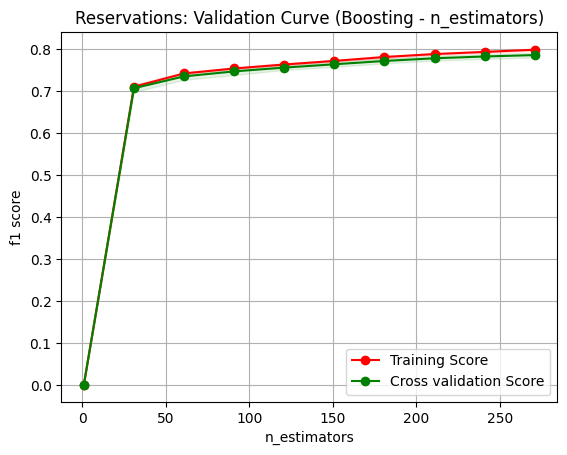

In [ ]:
plot_validation_curve(GradientBoostingClassifier(random_state=1), "Reservations: Validation Curve (Boosting - n_estimators)", x_train, y_train, param_name="n_estimators", param_range=np.arange(1, 300, 30))
plt.show()

### subsample

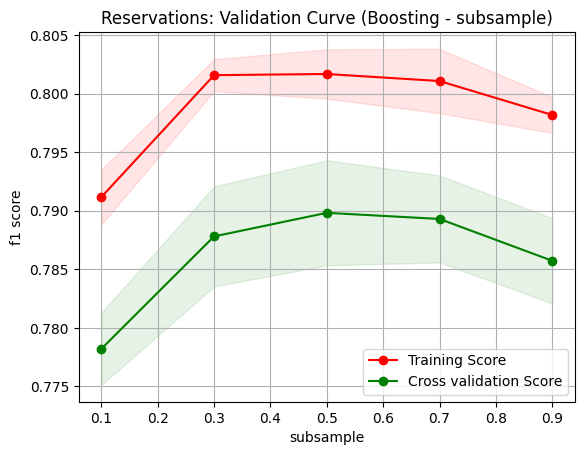

In [ ]:
plot_validation_curve(GradientBoostingClassifier(random_state=1, n_estimators=250), "Reservations: Validation Curve (Boosting - subsample)", x_train, y_train, param_name="subsample", param_range=np.arange(0.1, 1, 0.2))
plt.show()

## Learning Curve

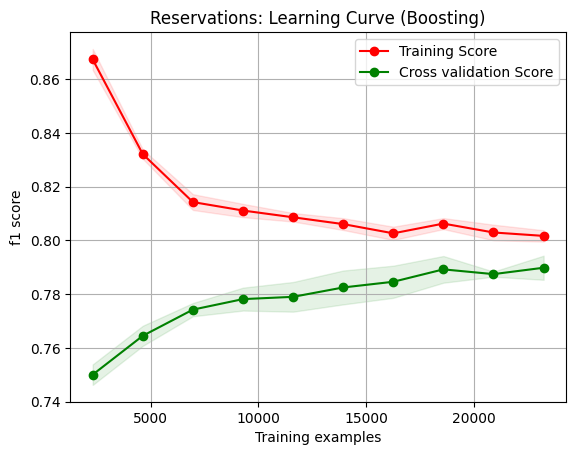

In [ ]:
plot_learning_curve(GradientBoostingClassifier(random_state=1, n_estimators=250, subsample=0.5), "Reservations: Learning Curve (Boosting)", x_train, y_train)
plt.show()

## Evaluation

In [ ]:
boosting_model = GradientBoostingClassifier(random_state=1, n_estimators=250, subsample=0.5)
boosting_model.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=250, random_state=1, subsample=0.5)

In [ ]:
y_pred = boosting_model.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.76      0.83      4907
           1       0.62      0.84      0.71      2348

    accuracy                           0.78      7255
   macro avg       0.76      0.80      0.77      7255
weighted avg       0.82      0.78      0.79      7255



#Support Vector Machine

## Grid Search

In [ ]:
# sv_parameters = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto', 0.1, 1]
# }

# clf = GridSearchCV(SVC(random_state=1), sv_parameters, cv=5, scoring='f1')
# clf.fit(x_train, y_train)
# print(clf.best_params_)

## Validation Curves

### Kernal

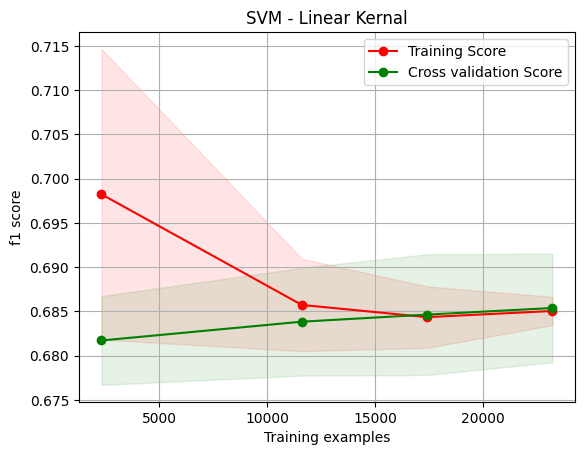

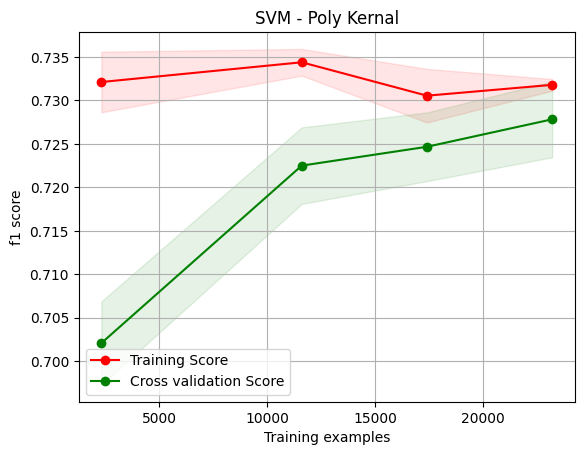

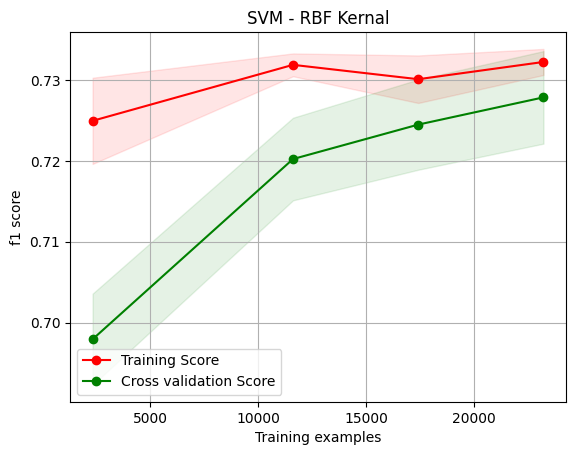

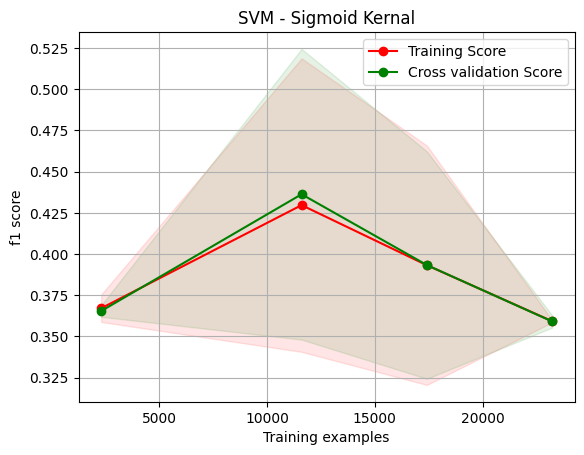

In [ ]:
plot_learning_curve(SVC(random_state=1, kernel ='linear', class_weight="balanced"), "SVM - Linear Kernel", x_train, y_train, train_sizes=[0.1,0.5,0.75,1])
plt.show()

plot_learning_curve(SVC(random_state=1, kernel ='poly', class_weight="balanced"), "SVM - Poly Kernel", x_train, y_train, train_sizes=[0.1,0.5,0.75,1])
plt.show()

plot_learning_curve(SVC(random_state=1, kernel ='rbf', class_weight="balanced"), "SVM - RBF Kernel", x_train, y_train, train_sizes=[0.1,0.5,0.75,1])
plt.show()

plot_learning_curve(SVC(random_state=1, kernel ='sigmoid', class_weight="balanced"), "SVM - Sigmoid Kernel", x_train, y_train, train_sizes=[0.1,0.5,0.75,1])
plt.show()

### C (Regularization Paramenter)

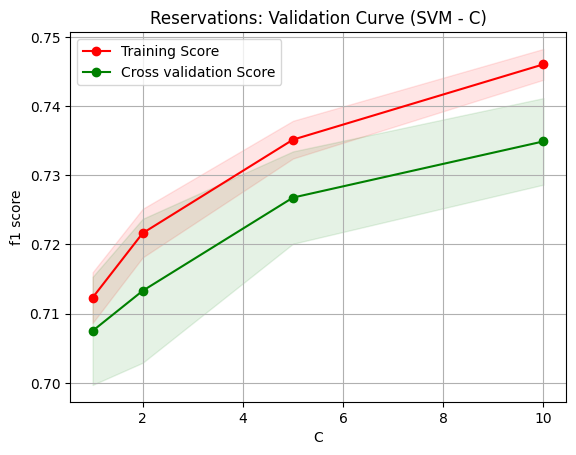

In [ ]:
plot_validation_curve(SVC(random_state=1, kernel ='rbf'), "Reservations: Validation Curve (SVM - C)", x_train, y_train, param_name="C", param_range=[0,1,2,5,10])
plt.show()

## Evaluation

In [ ]:
sv_model = SVC(random_state=1, kernel ='rbf', C=10)
sv_model.fit(x_train, y_train)

SVC(C=10, random_state=1)

In [ ]:
y_pred = sv_model.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.69      0.79      4907
           1       0.58      0.88      0.70      2348

    accuracy                           0.75      7255
   macro avg       0.75      0.79      0.74      7255
weighted avg       0.81      0.75      0.76      7255



#k-Nearest Neighbor

## Grid Search

In [ ]:
# knn_parameters = {
#     'n_neighbors': [1, 5, 10],
#     'weights': ['uniform', 'distance'],
# }

# clf = GridSearchCV(KNeighborsClassifier(), knn_parameters, cv=5, scoring='f1')
# clf.fit(x_train, y_train)
# print(clf.best_params_)

## Validation Curve

### N Neighbors

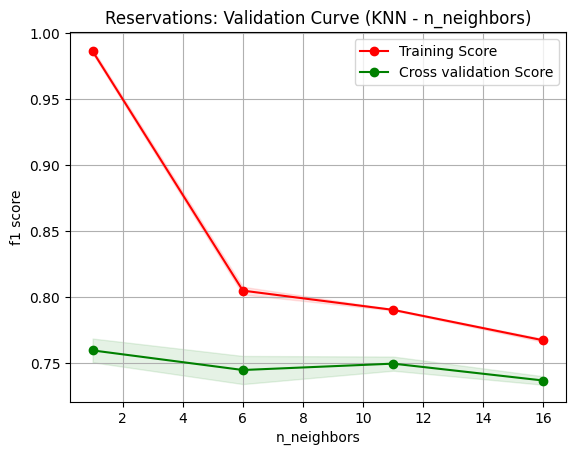

In [ ]:
plot_validation_curve(KNeighborsClassifier(), "Reservations: Validation Curve (KNN - N neighbors)", x_train, y_train, param_range=np.arange(1,21,5), param_name="n_neighbors")
plt.show()

### p (Power parameter)

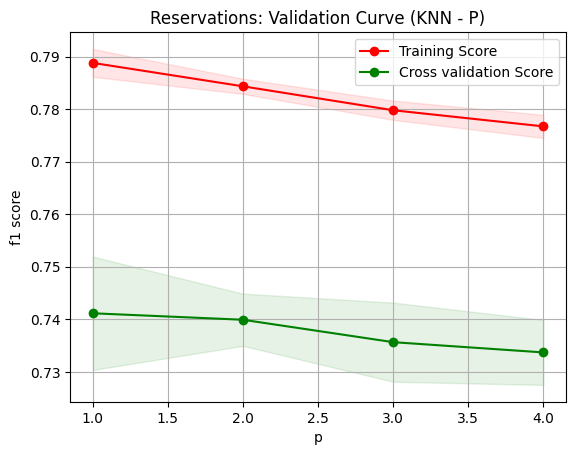

In [ ]:
plot_validation_curve(KNeighborsClassifier(n_neighbors=11), "Reservations: Validation Curve (KNN - P)", x_train, y_train, param_range=np.arange(1,5,1), param_name="p")
plt.show()

## Learning Curve

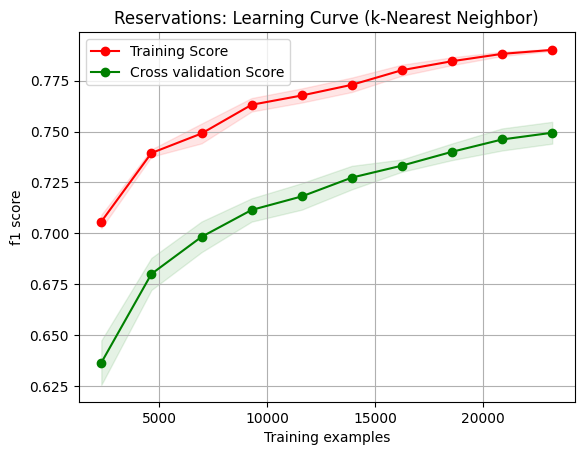

In [ ]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=11, p=2), "Reservations: Learning Curve (k-Nearest Neighbor)", x_train, y_train)
plt.show()

## Evaluation

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=11, p=2)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
y_pred = knn_model.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89      4907
           1       0.77      0.75      0.76      2348

    accuracy                           0.85      7255
   macro avg       0.82      0.82      0.82      7255
weighted avg       0.84      0.85      0.84      7255



# Model Comparisons

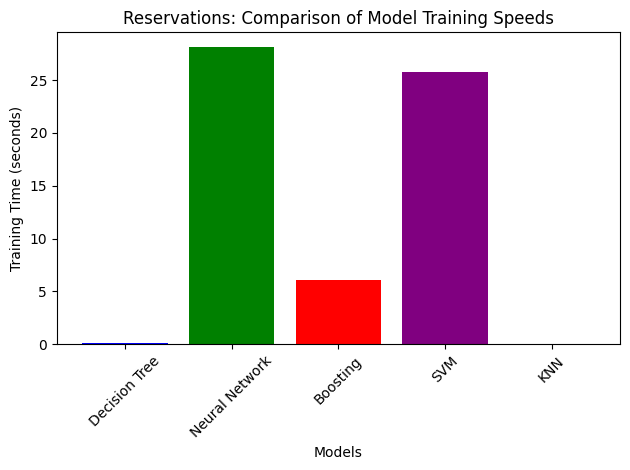

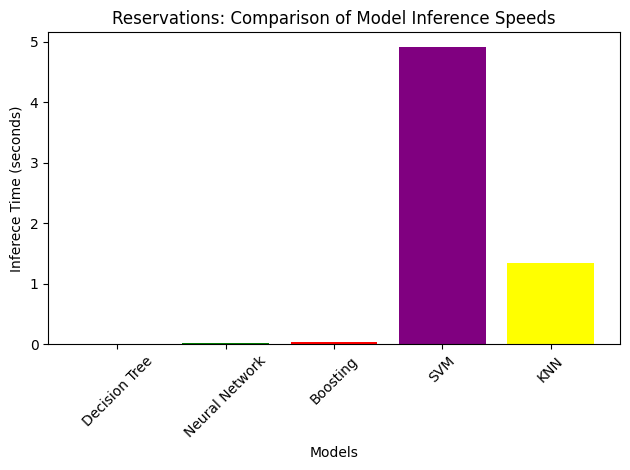

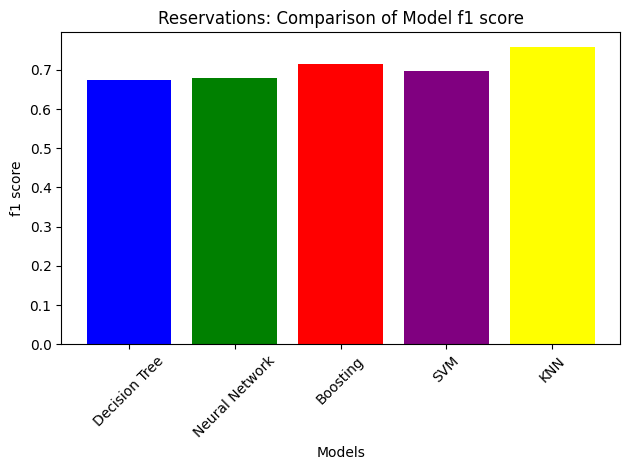

In [ ]:
compare_models()